In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [8]:
rv=pd.read_csv(r"F:\study\data science\pandas_dataset\RestaurantVisitors.csv", index_col = 'date' , parse_dates = True)
# parse_dates=true as many column 

In [9]:
rv.head(5)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [10]:
rv.shape

(517, 8)

In [6]:
rv.tail(5)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [5]:
rv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [6]:
rv.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
rv.shape

(517, 8)

In [8]:
rv.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [9]:
rv=rv.dropna() #drop null

In [10]:
rv.isnull().sum()

weekday         0
holiday         0
holiday_name    0
rest1           0
rest2           0
rest3           0
rest4           0
total           0
dtype: int64

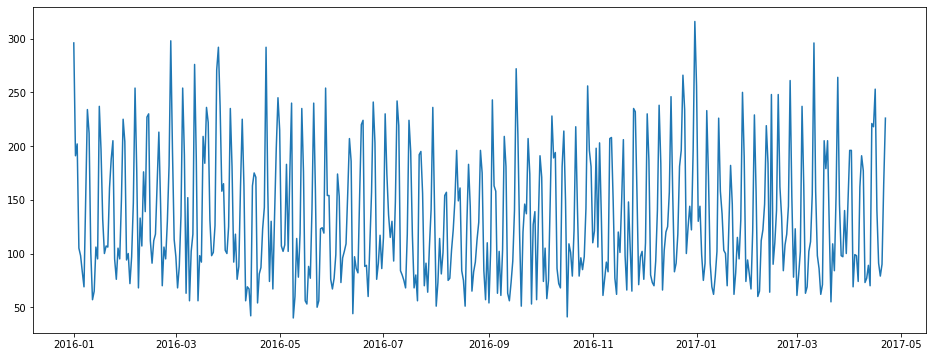

In [11]:

plt.figure(figsize=(16,6))
plt.plot(rv.total)

In [12]:
# sharp picks could be holiday
# no indicatoor for holifays
# so now put indicator for holidays in the graphs


In [13]:
index_pos=rv[rv['holiday']==1].index# 1 for holidays and 0 for not holiday

In [14]:
index_pos

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

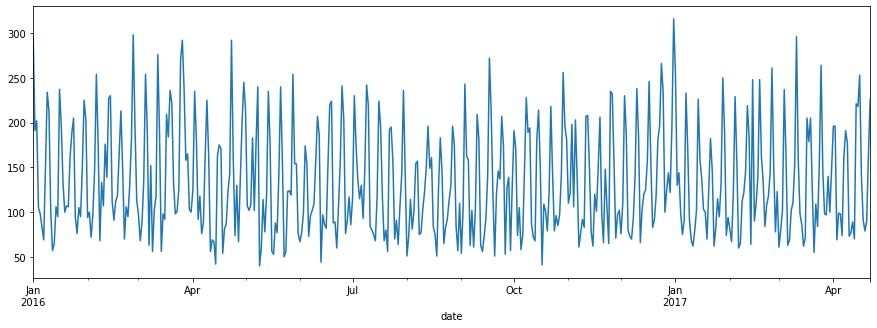

In [15]:
# lets do again plotbut these time put the holiday .now plot in some different way
ax=rv['total'].plot(figsize=(15,5)) # same graph as above no

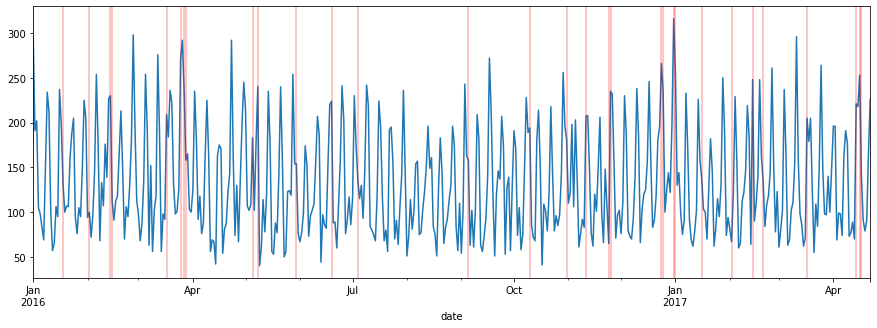

In [16]:
ax=rv['total'].plot(figsize=(15,5))
for day in index_pos:
        ax.axvline(day,color="red",alpha=.3) # now we can see high picks coinciding with high line
        # alpha is for transparency of line
        # holiday can be explained where we see overlappingfro

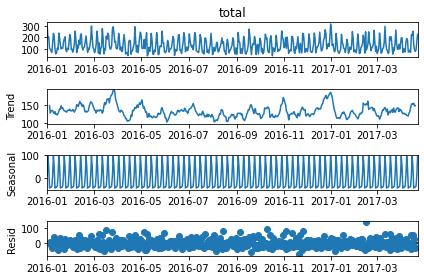

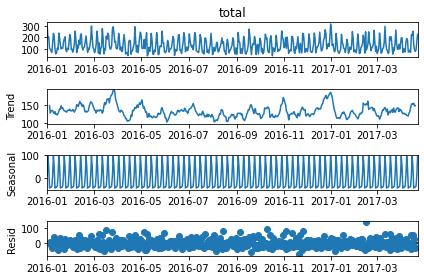

In [18]:
rv_seasonal=seasonal_decompose(rv['total'])
rv_seasonal.plot()
# though we dont need these plot as from looking data we can see it is following week seasonal pattern

In [19]:
train_rv=rv.iloc[0:450]
test_rv=rv.iloc[450:479]

In [21]:
auto_arima(rv['total'],seasonal=True,m=7)

C:\Users\Admin\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,0,0)(2,0,1)[7] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\Admin\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\Admin\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 397, in _fit_wrapper
    **fit_args)
  File "C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 659, in fit
    skip_hessian=True, **kwargs)
  File "C:\Users\Admin\anaconda3\lib\site-packages\stats

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [22]:
# from auto_arima we find values of p,d,q on whole data
#and we see these values to sarimax on that time we build model only on train daa
# using auto_Arima we get values and we pass these values to sarima and  sarimax

model_sarima=SARIMAX(train_rv['total'],order=(0,0,0),seasonal_order=(1,0,1,7)) # without holiday
results=model_sarima.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [23]:
pred_rv=results.predict(start=450,end=477)

In [24]:
pred_rv

2017-03-26    174.192171
2017-03-27     90.608644
2017-03-28     95.758892
2017-03-29     95.479845
2017-03-30     96.689789
2017-03-31    145.286250
2017-04-01    232.772855
2017-04-02    174.181229
2017-04-03     90.602953
2017-04-04     95.752877
2017-04-05     95.473848
2017-04-06     96.683716
2017-04-07    145.277125
2017-04-08    232.758234
2017-04-09    174.170289
2017-04-10     90.597262
2017-04-11     95.746863
2017-04-12     95.467851
2017-04-13     96.677643
2017-04-14    145.268000
2017-04-15    232.743615
2017-04-16    174.159349
2017-04-17     90.591571
2017-04-18     95.740849
2017-04-19     95.461854
2017-04-20     96.671571
2017-04-21    145.258875
2017-04-22    232.728996
Freq: D, dtype: float64

In [25]:
# build two models
# without holiday
# with holiday
import numpy as np
mse=np.mean(np.square(test_rv.total-pred_rv))
print(mse)

875.4643176098607


In [26]:
rmse=np.sqrt(mse)
print(rmse)

29.588246274658808


In [27]:
test_rv[test_rv['holiday']==1].index

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

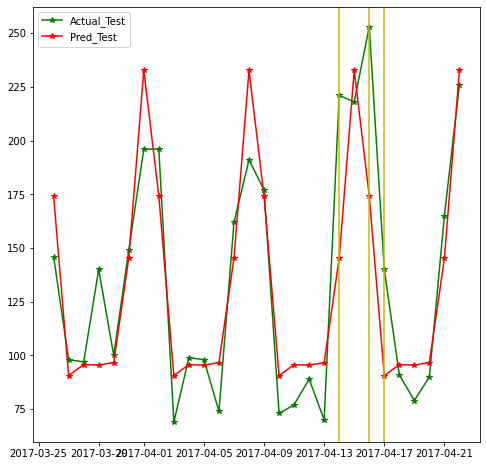

In [28]:
plt.figure(figsize= (8 , 8))
plt.plot(test_rv.total , marker ="*" , color ="g" , label ="Actual_Test")
plt.plot(pred_rv , color ="r" , marker ="*" ,label ="Pred_Test")
plt.legend()
plt.axvline(x = '2017-04-14' , color = 'y')
plt.axvline(x = '2017-04-16' , color = 'y')
plt.axvline(x = '2017-04-17' , color = 'y')

In [29]:
# does model is ggiving right prediction for holidays
# see actual and predicted on holiday

In [30]:
auto_arima(rv['total'],seasonal=True,m=7,exogenous=rv[['holiday']])

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [31]:
#rv['holiday']# coulmn format
#rv[['holidday']]# in dataframe format
#rv[[holiday]] there can be more than one column can be considered as exogenous so need to pass data in adataframe format

In [32]:
# model with holidays
from statsmodels.tsa.statespace.sarimax import SARIMAX

model2=SARIMAX(train_rv['total'],order=(1,0,0),seasonal_order=(1,0,1,7),exog=train_rv[['holiday']]) # without holiday
results1=model2.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [33]:
pred_rv_exog=results1.predict(start=450,end=477,exog=test_rv[['holiday']])

In [34]:
pred_rv_exog

2017-03-26    176.352278
2017-03-27     81.862663
2017-03-28     93.018549
2017-03-29     95.452470
2017-03-30     92.484702
2017-03-31    138.962458
2017-04-01    228.771033
2017-04-02    169.409618
2017-04-03     80.493140
2017-04-04     92.744464
2017-04-05     95.394027
2017-04-06     92.468912
2017-04-07    138.952330
2017-04-08    228.757330
2017-04-09    169.399690
2017-04-10     80.488445
2017-04-11     92.739069
2017-04-12     95.388481
2017-04-13     92.463537
2017-04-14    207.883967
2017-04-15    228.744031
2017-04-16    238.329557
2017-04-17    149.423481
2017-04-18     92.733678
2017-04-19     95.382935
2017-04-20     92.458161
2017-04-21    138.936174
2017-04-22    228.730734
Freq: D, dtype: float64

In [35]:
import numpy as np
mse=np.mean(np.square(test_rv.total-pred_rv_exog))
print(mse)

359.2448848261806


In [36]:
rmse=np.sqrt(mse)
print(rmse)

18.95375648324576


In [37]:
#mape
r=np.mean(np.abs((test_rv.total-pred_rv_exog)*100/test_rv.total)) # 55.78
#12
print(r)

12.226407241684793


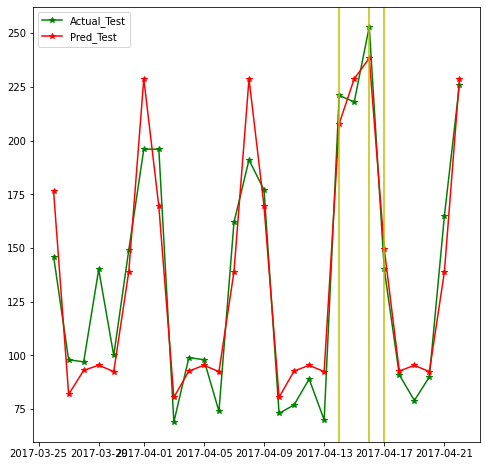

In [38]:
plt.figure(figsize= (8 , 8))
plt.plot(test_rv.total , marker ="*" , color ="g" , label ="Actual_Test")
plt.plot(pred_rv_exog , color ="r" , marker ="*" ,label ="Pred_Test")
plt.legend()
plt.axvline(x = '2017-04-14' , color = 'y')
plt.axvline(x = '2017-04-16' , color = 'y')
plt.axvline(x = '2017-04-17' , color = 'y')

In [39]:
# only for comparision purpose
test_rv[test_rv.holiday==1].total# gives actual value on 3 holiday

date
2017-04-14    221.0
2017-04-16    253.0
2017-04-17    140.0
Name: total, dtype: float64

In [40]:
print(pred_rv['2017-04-14' ])# this is withour exog
print(pred_rv['2017-04-16' ])
print(pred_rv['2017-04-17' ])



145.26799976422868
174.15934913551266
90.59157125236203


In [41]:
print(pred_rv_exog['2017-04-14' ])# this is  exog
print(pred_rv_exog['2017-04-16' ])
print(pred_rv_exog['2017-04-17' ])



207.88396720956445
238.32955725919902
149.4234808030114
